In [16]:
import numpy as np

## Eigenvals and Eigenvectors ##

In [17]:
a = np.array([[2, 2, 4], [1, 3, 5], [ 2, 3, 4]])

In [18]:
w, v = np.linalg.eig(a)

In [19]:
print ('Eigenvalues: ', w)

Eigenvalues:  [ 8.80916362  0.92620912 -0.73537273]


In [20]:
print ('Eigenvectors: ', v)

Eigenvectors:  [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


## Singular Value Decomposition ## 

In [21]:
u, s, v_t = np.linalg.svd(a)

In [22]:
print(u)

[[-0.52157957  0.51176432 -0.68268004]
 [-0.62993653 -0.7706383  -0.09641875]
 [-0.57544307  0.37975505  0.72432823]]


In [23]:
print(s)

[ 9.30064272  1.06283875  0.60697515]


In [24]:
print(v_t)

[[-0.30363297 -0.50096516 -0.81045724]
 [ 0.95254376 -0.14030457 -0.27013886]
 [-0.02161931  0.85401905 -0.51979233]]


Let's recreate the original matrix from U, S, V

In [25]:
sigma = np.zeros((a.shape[0], a.shape[1]))
sigma

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [26]:
sigma[:a.shape[1],:a.shape[1]] = np.diag(s)

In [27]:
sigma

array([[ 9.30064272,  0.        ,  0.        ],
       [ 0.        ,  1.06283875,  0.        ],
       [ 0.        ,  0.        ,  0.60697515]])

In [28]:
np.diag(s)

array([[ 9.30064272,  0.        ,  0.        ],
       [ 0.        ,  1.06283875,  0.        ],
       [ 0.        ,  0.        ,  0.60697515]])

In [29]:
b0 = np.dot(u,sigma)

In [30]:
b = np.dot(b0,v_t)

In [31]:
b

array([[ 2.,  2.,  4.],
       [ 1.,  3.,  5.],
       [ 2.,  3.,  4.]])

## SVD allows us to find the pseuo-inverse as well ##

In [32]:
s_plus = 1.0/s #Find the reciprocals of the eigevalues

In [33]:
sigma_plus = np.zeros(a.shape)

In [34]:
sigma_plus[:a.shape[1],:a.shape[1]] = np.diag(s_plus)

In [35]:
a_pinv0 = np.dot(v_t.T,sigma_plus.T) 
a_pinv0

array([[-0.03264645,  0.89622604, -0.03561811],
       [-0.0538635 , -0.13200927,  1.40700827],
       [-0.08713992, -0.25416731, -0.85636509]])

In [36]:
a_pinv = np.dot(a_pinv0,u.T) 

In [37]:
a_pinv

array([[  5.00000000e-01,  -6.66666667e-01,   3.33333333e-01],
       [ -1.00000000e+00,   2.22044605e-16,   1.00000000e+00],
       [  5.00000000e-01,   3.33333333e-01,  -6.66666667e-01]])

In [38]:
np.linalg.pinv(a)

array([[  5.00000000e-01,  -6.66666667e-01,   3.33333333e-01],
       [ -1.00000000e+00,   2.22044605e-16,   1.00000000e+00],
       [  5.00000000e-01,   3.33333333e-01,  -6.66666667e-01]])

In [39]:
np.linalg.inv(a)

array([[ 0.5       , -0.66666667,  0.33333333],
       [-1.        ,  0.        ,  1.        ],
       [ 0.5       ,  0.33333333, -0.66666667]])

## k-means Clustering ##

* Limited to linear cluster boundaries <br>
* Under the hood - uses some form of expectation-maximization (EM) <br>
* Unsupervised but needs the # of clusters to be specified <br>
* Slow for a large number of samples <br>

In [40]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets.samples_generator import make_blobs

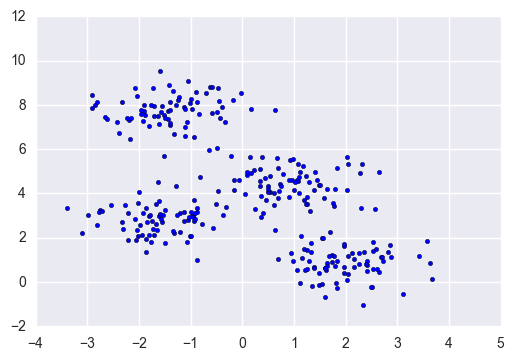

In [42]:
#X will store the coordinates (both axes) and y_true tells you which cluster it is in

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()

In [43]:
#X has both coordinates from the blobs above. y_kmeans is the predicted cluster for those points

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

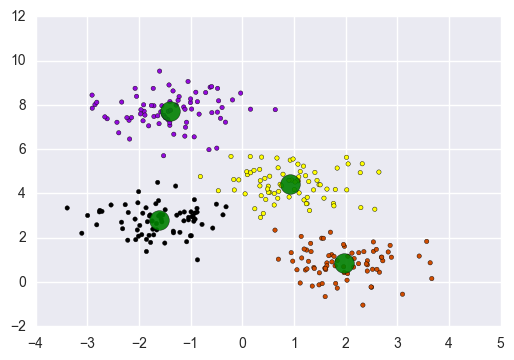

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='gnuplot')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.9);
plt.show()

Let's break it ...

In [45]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.06, random_state=0)

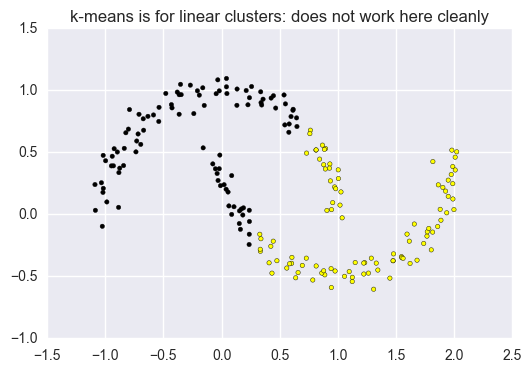

In [46]:
kmeans2 = KMeans(n_clusters= 2, random_state=0)
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans2, s=10, cmap='gnuplot')
plt.title('k-means is for linear clusters: does not work here cleanly')
plt.show()

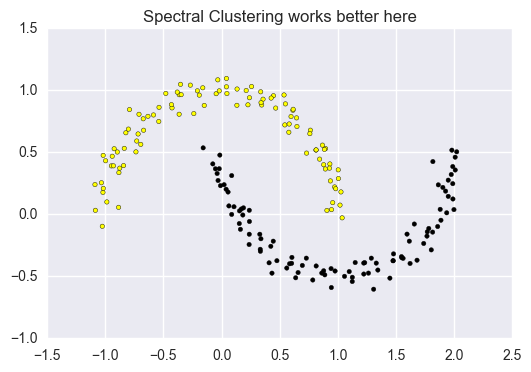

In [47]:
from sklearn.cluster import SpectralClustering
kmeans3 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')

y_kmeans3 = kmeans3.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans3,s=10, cmap='gnuplot')
plt.title('Spectral Clustering works better here')
plt.show()

### Use k-means for Real World Data ###

In [48]:
#Get the imagery data for numbers 0 through 9. Each image is 8 X 8 == 64 pixels andd there are 1797 of them
from sklearn.datasets import load_digits
numbers = load_digits()
numbers.data.shape

(1797, 64)

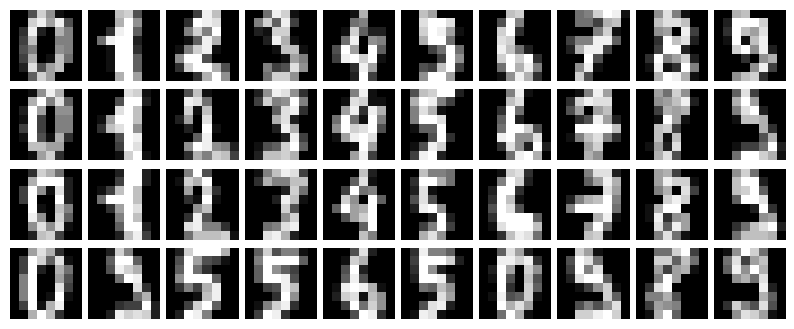

In [49]:
def plot_numbers(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='gray', interpolation='nearest', clim=(0, 16))
plot_numbers(numbers.data)
plt.show()

In [50]:
kmeans4 = KMeans(n_clusters=10, random_state=0)
clusters = kmeans4.fit_predict(numbers.data)
kmeans4.cluster_centers_.shape

(10, 64)

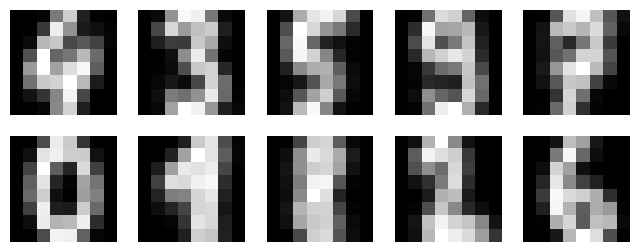

In [51]:
#Plot the cluster centers
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans4.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap='gray')
plt.show()

In [52]:
numbers.target.shape

(1797,)

In [53]:
#Count the predictions
counter = np.zeros(10)
for j in range(10):
    for i in range(clusters.shape[0]):
        if j == clusters[i]:
            counter[j] = counter[j] + 1

In [54]:
#Count the number of labels from 0-9
targets = np.zeros(10)
for j in range(10):
    for i in range(numbers.target.shape[0]):
        if j == numbers.target[i]:
            targets[j] = targets[j] + 1

In [55]:
targets

array([ 178.,  182.,  177.,  183.,  181.,  182.,  181.,  179.,  174.,  180.])

In [56]:
counter

array([ 166.,  176.,  149.,  250.,  206.,  179.,   90.,  224.,  175.,  182.])

In [57]:
x1 = np.abs(counter - targets)
100 - 100*np.mean(x1/targets)

84.496825477445185

In [58]:
x2 = (targets - x1)/targets
np.mean(x2) #Array showing the accuracy of predictions for each number

0.84496825477445192

k-means is not flexible enough <br>
let's use Gaussian Mixture Model which returns probabilistic cluster assignments <br>

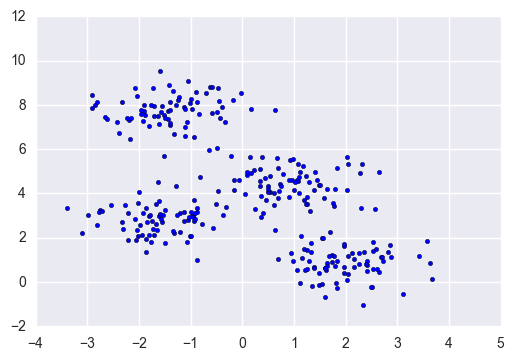

In [63]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()

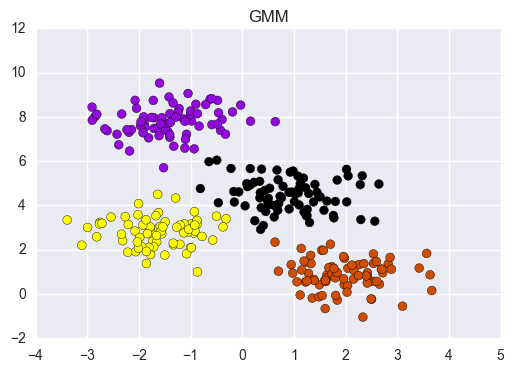

In [82]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='gnuplot')
plt.title('GMM')
plt.show()

In [68]:
#GMM gives a probability of each point being in each cluster
probs = gmm.predict_proba(X)
print(probs[:10].round(4))

[[ 0.5316  0.1046  0.      0.3638]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      0.      1.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.965   0.0011  0.      0.0339]
 [ 1.      0.      0.      0.    ]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      0.      1.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      1.      0.    ]]


In [69]:
X.shape

(300, 2)

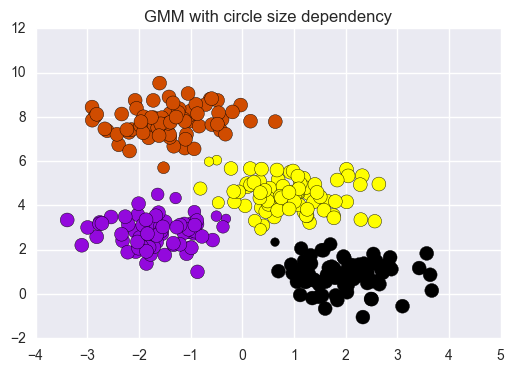

In [81]:
#Plot clusters with point sizes based on probabilities
size = 100* probs.max(1)**(1.5)  
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='gnuplot', s=size)
plt.title('GMM with circle size dependency')
plt.show()

## Sampling from a GMM created distribution ##

In [83]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.06, random_state=0)

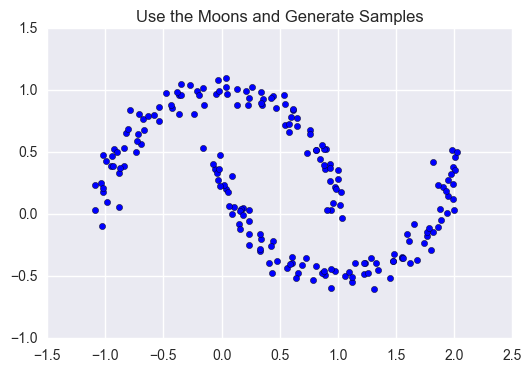

In [87]:
plt.scatter(X[:,0],X[:,1])
plt.title('Use the Moons and Generate Samples')
plt.show()

In [134]:
gmm_moon = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
gmm_moon.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [135]:
x_draws = gmm_moon.sample(200)

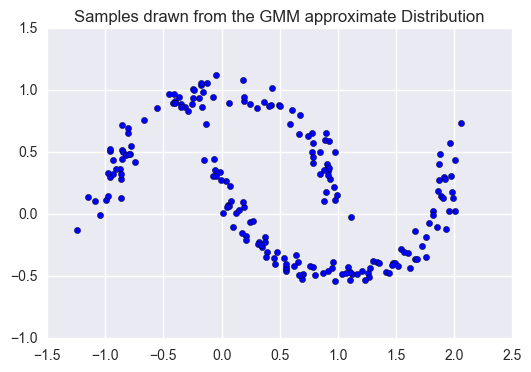

In [138]:
d = x_draws[0]
plt.scatter(d[:,0],d[:,1], cmap = 'gnuplot')
plt.title('Samples drawn from the GMM approximate Distribution')
plt.show()